<a href="https://colab.research.google.com/github/khnwave/khnwave/blob/pytorch/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Wed May  7 10:50:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


2.6.0+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

In [4]:
print("자율주행자동차, 카메라 포토 앱, cctv")

자율주행자동차, 카메라 포토 앱, cctv


## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [5]:
print('오버피팅은 모델이 지나치게 학습되어서 예측하는 모델이 되는 것이 아닌 학습된 데이터에 대해서만 예측이 완벽히 되어 일반적인 예측이 되지 않는 것을 의미한다.')

오버피팅은 모델이 지나치게 학습되어서 예측하는 모델이 되는 것이 아닌 학습된 데이터에 대해서만 예측이 완벽히 되어 일반적인 예측이 되지 않는 것을 의미한다.


## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

- 정규화를 통해 가중치에 패널티를 부여해 과적합을 방지하는 것
- 조기종료를 통해 모델이 학습 도중 검증 데이터의 성능이 더이상 개선되지 않으면 학습을 중단해 과도한 학습으로 인한 과적합을 방지
- 복잡도 줄이기. 인공 신경망의 복잡도는 은닉층(hidden layer)의 수나 매개변수의 수 등으로 결정되기에 과적합 현상이 포착되었을 때, 이들의 수를 줄이는 것.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [6]:
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Setup training data
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# Setup testing data
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 493kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.71MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.11MB/s]


## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [11]:
class_names = train_data.classes

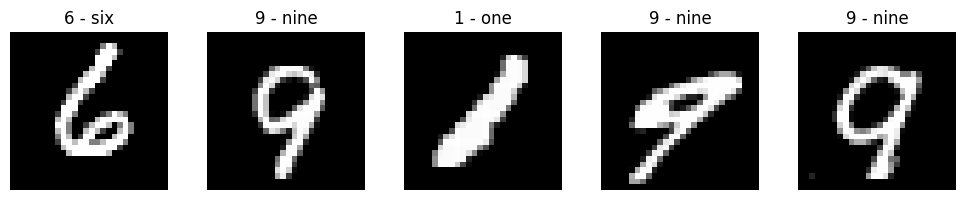

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 2))

for i in range(1, 6):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    ax = fig.add_subplot(rows, cols, i)
    ax.set_title(class_names[label])
    ax.axis("off")
    ax.imshow(img.squeeze(), cmap="gray")

plt.tight_layout()

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [22]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fb78e2a0250>, <torch.utils.data.dataloader.DataLoader object at 0x7fb7795fb390>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [29]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 장치 설정
device = "cuda" if torch.cuda.is_available() else "cpu"

# TinyVGG 구조 구현
class MNISTModelV2(nn.Module):
    """
    CNN Explainer의 TinyVGG 구조 기반 모델
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

class_names = [str(i) for i in range(10)]
torch.manual_seed(42)
model_2 = MNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)
print(model_2)


MNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)


## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [52]:
device = "cuda" if torch.cuda.is_available() else "cpu"

def accuracy_fn(y_true: torch.Tensor, y_pred: torch.Tensor) -> float:
    return (y_true == y_pred).sum().item() / len(y_true) * 100


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [53]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [54]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)
device = "cpu"
from tqdm.auto import tqdm

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.02275 | Train accuracy: 99.22%
Test loss: 0.03756 | Test accuracy: 98.91%

Epoch: 1
---------
Train loss: 0.02014 | Train accuracy: 99.34%
Test loss: 0.03990 | Test accuracy: 98.92%

Epoch: 2
---------
Train loss: 0.02013 | Train accuracy: 99.31%
Test loss: 0.06497 | Test accuracy: 98.41%

Epoch: 3
---------
Train loss: 0.01827 | Train accuracy: 99.39%
Test loss: 0.05206 | Test accuracy: 98.70%

Epoch: 4
---------
Train loss: 0.01799 | Train accuracy: 99.42%
Test loss: 0.04316 | Test accuracy: 98.84%

Train time on cpu: 185.237 seconds


In [42]:
device = "cuda"

# Train and test model
epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.03761 | Train accuracy: 98.81%
Test loss: 0.04286 | Test accuracy: 98.64%

Epoch: 1
---------
Train loss: 0.03424 | Train accuracy: 98.88%
Test loss: 0.04695 | Test accuracy: 98.41%

Epoch: 2
---------
Train loss: 0.03132 | Train accuracy: 99.00%
Test loss: 0.03638 | Test accuracy: 98.83%

Epoch: 3
---------
Train loss: 0.02953 | Train accuracy: 99.08%
Test loss: 0.03750 | Test accuracy: 98.82%

Epoch: 4
---------
Train loss: 0.02875 | Train accuracy: 99.07%
Test loss: 0.04411 | Test accuracy: 98.66%

Train time on cuda: 308.085 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

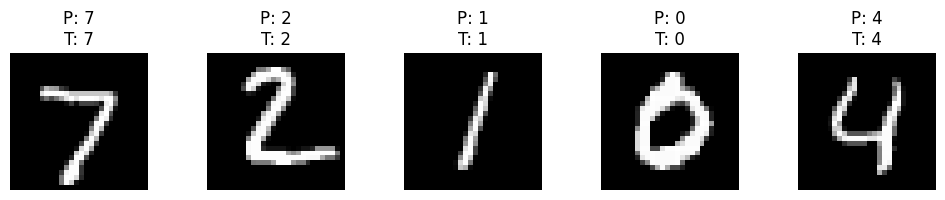

In [50]:
model_2.eval()

fig = plt.figure(figsize=(10, 2))

# 예측 (Grad 비활성화)
with torch.inference_mode():
    for i in range(5):
        # 테스트 데이터에서 이미지와 정답 레이블 불러오기
        img, label = test_data[i]
        img_expanded = img.unsqueeze(0).to(device)  # 배치 차원 추가
        pred = model_2(img_expanded).argmax(dim=1).item()

        # subplot에 이미지 표시
        ax = fig.add_subplot(1, 5, i+1)
        ax.imshow(img.squeeze(), cmap="gray")
        ax.set_title(f"P: {pred}\nT: {label}")
        ax.axis("off")

plt.tight_layout()
plt.show()

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [56]:
device = "cuda" if torch.cuda.is_available() else "cpu"

from tqdm.auto import tqdm

# 모델을 적절한 장치로 옮기고 평가 모드로 설정
model_2.to(device)
model_2.eval()

y_preds = []
y_trues = []

with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Collecting predictions"):
        X, y = X.to(device), y.to(device)
        y_logit = model_2(X)
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

        y_preds.append(y_pred.cpu())
        y_trues.append(y.cpu())

# 텐서를 하나로 연결
y_preds_tensor = torch.cat(y_preds)
y_trues_tensor = torch.cat(y_trues)

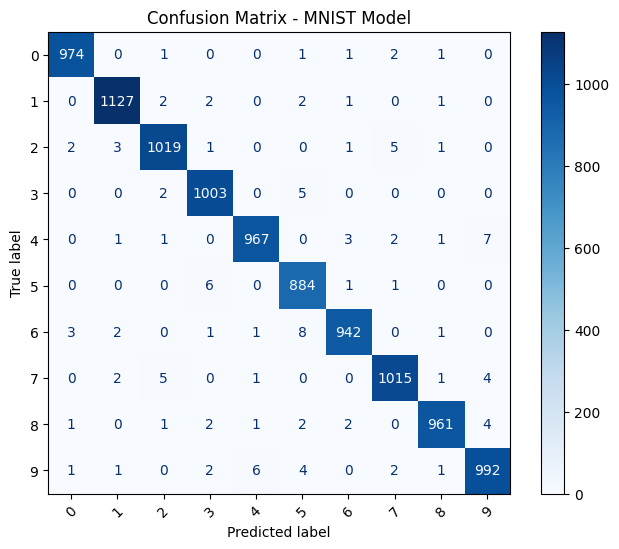

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix 계산
cm = confusion_matrix(y_trues_tensor, y_preds_tensor)

# 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap="Blues", colorbar=True, xticks_rotation=45)
plt.title("Confusion Matrix - MNIST Model")
plt.show()


## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [58]:
x = torch.randn(1, 3, 64, 64)
print("Input shape:", x.shape)

kernel_sizes = [1, 3, 5, 7, 11]

for k in kernel_sizes:
    conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=k, stride=1, padding=0)
    out = conv_layer(x)
    print(f"kernel_size={k} --> Output shape: {out.shape}")

Input shape: torch.Size([1, 3, 64, 64])
kernel_size=1 --> Output shape: torch.Size([1, 10, 64, 64])
kernel_size=3 --> Output shape: torch.Size([1, 10, 62, 62])
kernel_size=5 --> Output shape: torch.Size([1, 10, 60, 60])
kernel_size=7 --> Output shape: torch.Size([1, 10, 58, 58])
kernel_size=11 --> Output shape: torch.Size([1, 10, 54, 54])



- kernel_size 가 작을수록 출력 크기가 크고, 커질수록 이미지 크기가 줄어든다.



## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [59]:
from torchvision import datasets, transforms

# 데이터 전처리
transform = transforms.ToTensor()

# 테스트셋만 로드
fashion_test_data = datasets.FashionMNIST(
    root="./data",
    train=False,
    download=True,
    transform=transform
)

fashion_class_names = fashion_test_data.classes


100%|██████████| 26.4M/26.4M [00:02<00:00, 11.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 200kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.71MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 4.16MB/s]


In [60]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
fashion_test_loader = DataLoader(fashion_test_data, batch_size=BATCH_SIZE, shuffle=False)

# 모델 장치 설정
model_2.to(device)
model_2.eval()


MNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [61]:
y_preds = []
y_trues = []
images = []

with torch.inference_mode():
    for X, y in fashion_test_loader:
        X, y = X.to(device), y.to(device)
        y_logits = model_2(X)
        y_pred = torch.argmax(y_logits, dim=1)

        y_preds.extend(y_pred.cpu())
        y_trues.extend(y.cpu())
        images.extend(X.cpu())  # 시각화를 위해 이미지 저장

In [62]:
wrong_indices = [i for i in range(len(y_preds)) if y_preds[i] != y_trues[i]]


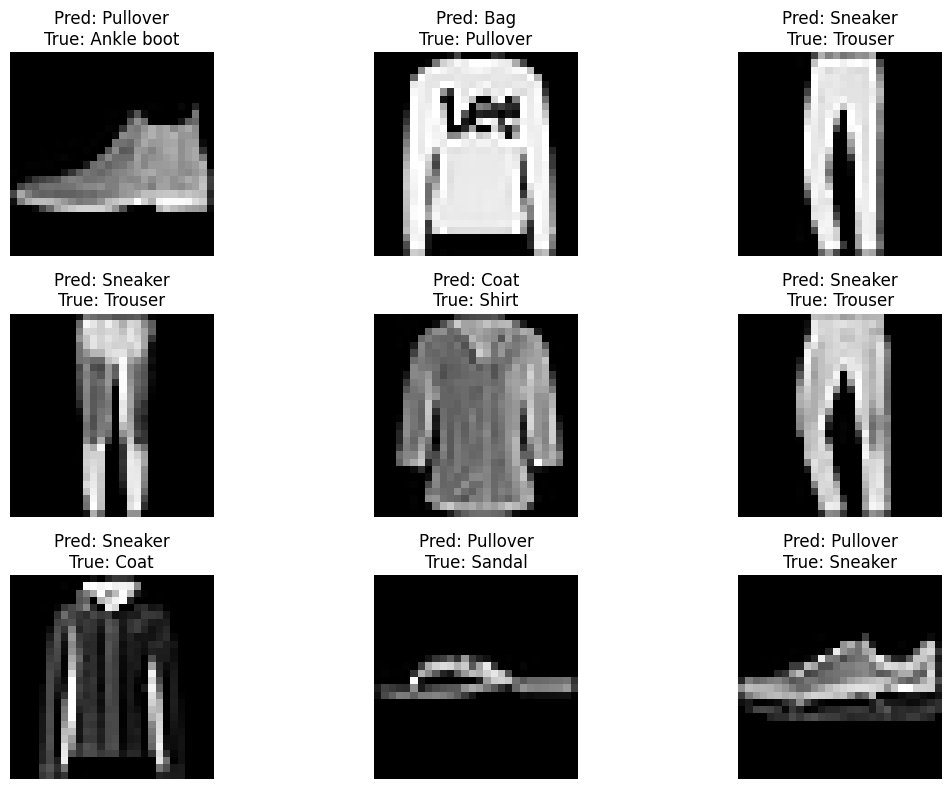

In [63]:
import matplotlib.pyplot as plt

# 9개만 보여주기
plt.figure(figsize=(12, 8))
for i, idx in enumerate(wrong_indices[:9]):
    img = images[idx].squeeze()
    pred_label = fashion_class_names[y_preds[idx]]
    true_label = fashion_class_names[y_trues[idx]]

    ax = plt.subplot(3, 3, i+1)
    ax.imshow(img, cmap="gray")
    ax.set_title(f"Pred: {pred_label}\nTrue: {true_label}")
    ax.axis("off")

plt.tight_layout()
plt.show()
